In [ ]:

%load_ext autoreload
%autoreload 2


In [46]:
from lib.distr_diff_fcns import jensen_shannon_divergence
from lib.common.mlm_singleton import init_singleton_scorer
from rozlib.libs.plotting.utils_latex_matplot import config_matplot_for_latex, FigSaver, save_fig
from lib.scoring_fns import probability, surprisal
import os

# make sure we init the scorer for all modules first
mlm_scorer = init_singleton_scorer('roberta-large')
# mlm_scorer = init_singleton_scorer('ltg/gpt-bert-babylm-base')

# make the warnings shut up (likely bc of latex call)
os.environ["TOKENIZERS_PARALLELISM"] = "true"


In [47]:

from pathlib import Path
fig_saver = FigSaver(Path("/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/supplemental/figs/top_level"))


Initializing fig saver at dir /Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/supplemental/figs/top_level


/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/rozlib-python/rozlib/libs/plotting/utils_latex_matplot.py:44: UserWarning: /Library/TeX/textbin will be added to path
  warnings.warn(f"/Library/TeX/textbin will be added to path")
/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/src/affinity/tokenization.py:344: UserWarning: using a function that does not assert that words match
  warnings.warn("using a function that does not assert that words match")


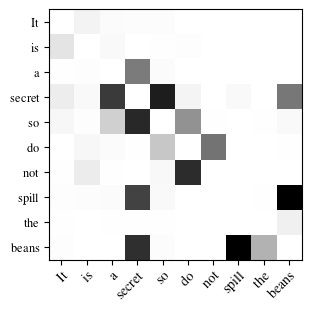

In [48]:

from lib.plotting.plot_corr_matrix import plot_heatmap
from affinity.corr_matrix_new import get_scores_new
from affinity.tokenization import Sentence


def make_local_plot(sent, cmap="Grays"):
    local_affinities, _, multi_tok_indices, global_affinities, preds = (
        get_scores_new(
            sent,
            score_fn = probability,
            num_preds=5,
            calculate_affinities=True,
            dist_diff_fn=jensen_shannon_divergence,
            normalize=False
        ))

    f = plot_heatmap(local_affinities,
                 sent.words_clean,
                 # actual_subs,
                 None,
                 cmap=cmap,
                 # title="Local Affinities",
                 xlabel_rotation=45,
                     return_fig=True
                 )
    return f

s1 = "It is a secret so do not spill the beans." # that the speech made me cry." #could get my clothes on"
s = Sentence(s1)
config_matplot_for_latex(10, dpi=100)
aff_map = make_local_plot(s)
fig_saver.save(aff_map, "aff_plot.png")



In [ ]:
from lib.plotting.plots import full_plot_single_sentence, plot_one_global_aff, plot_all_affinities
from affinity.plots_new import full_plot_single_sentence_new

# for paper ARRreview

def x(s):
    f = full_plot_single_sentence_new(s,
                                      do_print=True,
                                      plot_local=True,
                                      use_euclid=False,
                                      num_preds=5,
                                      add_scores_on_top_font_size=10,
                                      fig_size=(10,2)
                                      # normalize =False
                                      )

x(s1)
# x(s2)


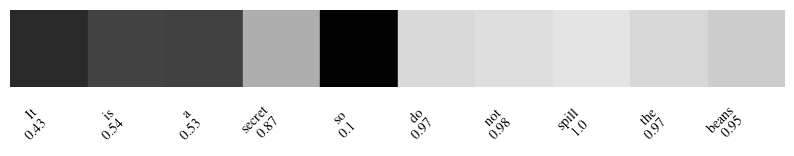

Error in callback <function _draw_all_if_interactive at 0x10a484a40> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\\\textcolor{Orange}{beans}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpe8io9hpc ea217875f36652814369b96ca50ad54c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./ea217875f36652814369b96ca50ad54c.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics-def/dvips.def)
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/mathcolor.ltx))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ea217875f36652814369b96ca50ad54c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! Package xcolor Error: Undefined color `Orange'.

See the xcolor package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily \textcolor{Orange}{beans}
                                         }%
No pages of output.
Transcript written on tmpe8io9hpc/ea217875f36652814369b96ca50ad54c.log.




RuntimeError: latex was not able to process the following string:
b'\\\\textcolor{Orange}{beans}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpphm4xig8 ea217875f36652814369b96ca50ad54c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./ea217875f36652814369b96ca50ad54c.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics-def/dvips.def)
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/mathcolor.ltx))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ea217875f36652814369b96ca50ad54c.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! Package xcolor Error: Undefined color `Orange'.

See the xcolor package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily \textcolor{Orange}{beans}
                                         }%
No pages of output.
Transcript written on tmpphm4xig8/ea217875f36652814369b96ca50ad54c.log.




<Figure size 300x300 with 1 Axes>

In [ ]:

from affinity.corr_matrix_new import get_logits_for_masked_sent, compute_surprisal_for_logits, compute_single_local_affinity

s1 = "It is a secret so do not spill the beans." # that the speech made me cry." #could get my clothes on"
s = Sentence(s1)    # Sentence class takes care of tokenization

# prepare sentence with mask at correct location
# punctuation is preserved, but will not be part of the mask
# this will error if your word is not actually present or if your word is multi-tokenized
# masked_sent keeps track of what was masked
# masked_sent = s.get_input_with_word_masked("Green")
compute_single_local_affinity(
    s,
    index_to_check=9,
    index_to_perturb=3,
    expect_word_at_index_to_check="beans",
    expect_word_at_index_to_perturb="secret",
    print_fills_topk=80
)



In [ ]:
base_inputs = [
    ('beans', 0.945),
    ('tea', 0.037),
    ('details', 0.0021),
    ('secret', 0.0013),
    ('coffee', 0.0011),
    ('milk', .00040730342152528465),
]
perturbed = [
    ('beans', 0.144),
    ('tea', 0.131),
    ('details', 0.0021),
    ('secret', 0.0021),
    ('coffee', 0.071),
    ('milk', .1311),
]


In [40]:
from matplotlib import pyplot as plt
from typing import Optional


def plot_histogram_from_pairs(
    items: list[tuple[str, float]],
    color = None,
    *,
    title: Optional[str] = None,
    rotate_xticks: int = 45,
        add_probs = False,
        add_labels = False
) -> plt.Axes:
    """
    Plot a categorical histogram (bar chart) from (label, value) pairs.

    Args:
        items: Sequence of (word, value) tuples.
        title: Optional plot title.
        rotate_xticks: Rotation for x-tick labels.

    Returns:
        The Matplotlib Axes.
    """
    if not items:
        raise ValueError("items must be non-empty")

    labels = [w for w, _ in items]
    values = [float(v) for _, v in items]

    fig, ax = plt.subplots()
    if color is not None:
        bars = ax.bar(range(len(values)), values, color=color, linewidth=0)
    else:
        bars = ax.bar(range(len(values)), values)
    if add_labels:
        ax.set_xticks(range(len(labels)), labels, rotation=rotate_xticks, ha="right")
    else:
        ax.set_xticks(range(len(labels)), [])
    ax.set_yticks([])
    ax.yaxis.set_visible(False)
    ax.set_ylim(0.0, 1)

    if add_probs:
        for rect in bars:
            height = rect.get_height()
            pct_str = f"{round(height * 100, 2):.2f}%"
            ax.annotate(
                pct_str,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points above the bar
                textcoords="offset points",
                ha="center",
                va="bottom",
                clip_on=False,
            )


    for spine in ax.spines.values():
        spine.set_visible(False)
    # ax.set_ylabel("Value")
    # if title:
    #     ax.set_title(title)
    # ax.margins(x=0.01)
    ax.margins(x=0.01, y=0.02)

    # ax.grid(axis="y", linestyle="--", alpha=0.3)
    return fig

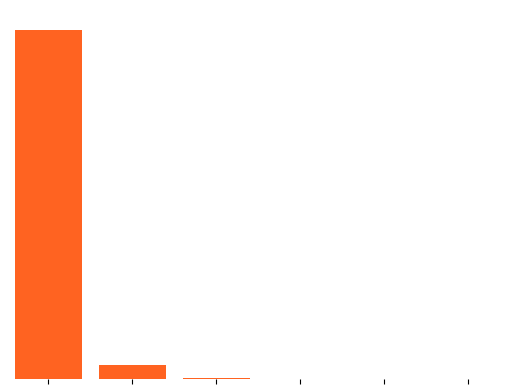

In [63]:
from make_graphics.graphics import Colors

# cmap = plt.cm.Dark2
# c = cmap.colors[2]
def cmyk_to_rgb01(cmyk: tuple[float, float, float]) -> tuple[float, float, float]:
    """
    Convert CMYK in [0,1] to RGB in [0,1].
    """
    c, m, y, k = cmyk
    if not all(0.0 <= v <= 1.0 for v in (c, m, y, k)):
        raise ValueError("CMYK components must be in [0,1].")
    r = (1.0 - c) * (1.0 - k)
    g = (1.0 - m) * (1.0 - k)
    b = (1.0 - y) * (1.0 - k)
    return (r, g, b)

# f = plot_histogram_from_pairs(base_inputs, color=Colors.cec_clist[0], add_labels=False)
f = plot_histogram_from_pairs(base_inputs, color="#ff6321", add_labels=False)
fig_saver.save(f, "dist_initial.png")

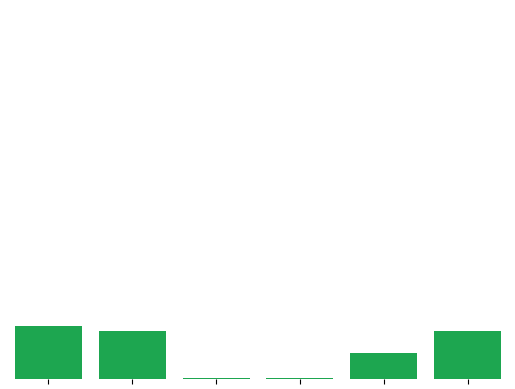

In [64]:

f2 = plot_histogram_from_pairs(perturbed, color="#1da650")
fig_saver.save(f2, "dist_final.png")



In [ ]:
print(s1)
gaf1 = plot_all_affinities(s1, do_make_local_aff_heatmap=False)

print(len(gaf1))
words = s1.strip(".").split(" ")
fig = plot_one_global_aff(
    gaf1,
    words,
    figsize_if_plotting_single=(4,2)
)
fig_saver.save(fig, "gaf.png")



In [ ]:
import matplotlib.pyplot as plt
config_matplot_for_latex(10, dpi=100)

from __future__ import annotations

# plt.rcParams["text.usetex"] = True
# Matplotlib ≥3.6 accepts list preamble; older versions accept a single string.
# plt.rcParams["text.latex.preamble"] = [
#     # r"\usepackage{xcolor}",
#     r"\usepackage{amsmath}",
# ]
# plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\n\usepackage{xcolor}"
plt.rcParams["text.latex.preamble"] = r"\usepackage{xcolor}"

# s = r"$\mathcal{P}^{\textcolor{blue}{\text{MASK}}}_{\textcolor{red}{s}}$"

# fig, ax = plt.subplots()
# ax.text(0.5, 0.5, s, fontsize=24, ha="center", va="center")
# ax.axis("off")
# plt.show()

# s = r"$\mathcal{P}^{\color{blue}{\mathrm{MASK}}}_{\color{red}{s}}$"
s = r"\textcolor{blue}{test}$"
# s = r"$\mathcal{P}$"

fig, ax = plt.subplots()
ax.text(0.5, 0.5, s, fontsize=24, ha="center", va="center")  # usetex=False by default
ax.axis("off")
plt.show()
